In [14]:
from math import pow
import matplotlib.pyplot as plt

## Приближение функций. Численные дефференциирование и интегрирование

## Cubic spline

In [15]:
x = [1,1.9,2.8,3.7,4.6]
y = [2.4142,1.0818,0.50953,0.11836,-0.24008]

x_star = 2.66666667

# x = [0,1,2,3,4]
# y = [0,1.8415,2.9093,3.1411,3.2432]

# x = [0.0, 1.0, 2.0, 3.0, 4.0]
# y = [0.0, 0.5, 0.86603, 1.0, 0.86603]

In [16]:
def cubic_spline(x,y,X=None):
    # коэф h
    h = [x[i]-x[i-1] for i in range(1, len(x))]
    # матрица для решения относительно с
    M = [[h[i-1], 2.0*(h[i-1]+h[i]), h[i]] for i in range(1, len(h))]
    M[0][0] = M[-1][2] = 0.0
    # правые коэф-ты
    b = [3.0*((y[i+1]-y[i])/h[i]-(y[i]-y[i-1])/h[i-1]) for i in range(1, len(h))]
    # решение триангулярной матрицы
    P = [-elem[2] for elem in M]
    Q = [elem for elem in b]
    P[0] /= M[0][1]
    Q[0] /= M[0][1]
    for i in range(1, len(b)):
        z = (M[i][1] + M[i][0] * P[i-1])
        P[i] /= z
        Q[i] -= M[i][0] * Q[i-1]
        Q[i] /= z
    x_ = [item for item in Q]
    for i in range(len(x_) - 2, -1, -1):
        x_[i] += P[i] * x_[i + 1]
    c = [0.0] + x_
    # коэф a
    a = list(y[:len(y)-1])
    # коэф b
    b = [(y[i] - y[i-1])/h[i-1] - (h[i-1]/3.0)*(2.0*c[i-1] + c[i]) for i in range(1, len(h))]
    b.append((y[-1] - y[-2])/h[-1] - (2.0*h[-1]*c[-1])/3.0)
    # коэф d
    d = [(c[i] - c[i-1])/(3.0*h[i-1]) for i in range(1, len(h))]
    d.append(-c[-1]/(3.0*h[-1]))
    resx, resy = [], []
    for i in range(len(x)-1):
        start = x[i]
        while start < x[i+1]:
            delt = start - x[i]
            resx.append(start)
            resy.append(a[i] + b[i]*delt + c[i]*pow(delt,2) + d[i]*pow(delt,3))
            start += 0.1
    if X != None:
        for i in range(len(x)-1):
            if X > x[i] and X < x[i+1]:
                delt = X - x[i]
                return a[i] + b[i]*delt + c[i]*pow(delt,2) + d[i]*pow(delt,3)
    return resx, resy

In [17]:
x_,y_ = cubic_spline(x,y)

Значение в точке 2.6 равно

In [18]:
cubic_spline(x,y,x_star)

0.5677413514650418

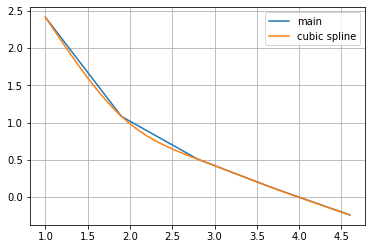

In [19]:
plt.plot(x, y, label='main')
plt.plot(x_, y_, label='cubic spline')
plt.legend()
plt.grid()